In [1]:
import ROOT
import numpy as np

Welcome to JupyROOT 6.30/04


Create model and dataset
-----------------------------------------------

Observable

In [2]:
x = ROOT.RooRealVar("x", "x", -20, 20)

Model (intentional strong correlations)

In [3]:
mean = ROOT.RooRealVar("mean", "mean of g1 and g2", 0, -10, 10)
sigma_g1 = ROOT.RooRealVar("sigma_g1", "width of g1", 3)
g1 = ROOT.RooGaussian("g1", "g1", x, mean, sigma_g1)

sigma_g2 = ROOT.RooRealVar("sigma_g2", "width of g2", 4, 3.0, 6.0)
g2 = ROOT.RooGaussian("g2", "g2", x, mean, sigma_g2)

frac = ROOT.RooRealVar("frac", "frac", 0.5, 0.0, 1.0)
model = ROOT.RooAddPdf("model", "model", [g1, g2], [frac])


[#0] WARNING:InputArguments -- The parameter 'sigma_g1' with range [-inf, inf] of the RooGaussian 'g1' exceeds the safe range of (0, inf). Advise to limit its range.


Generate 1000 events

In [4]:
data = model.generate({x}, 2000)

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (g2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (g1)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()


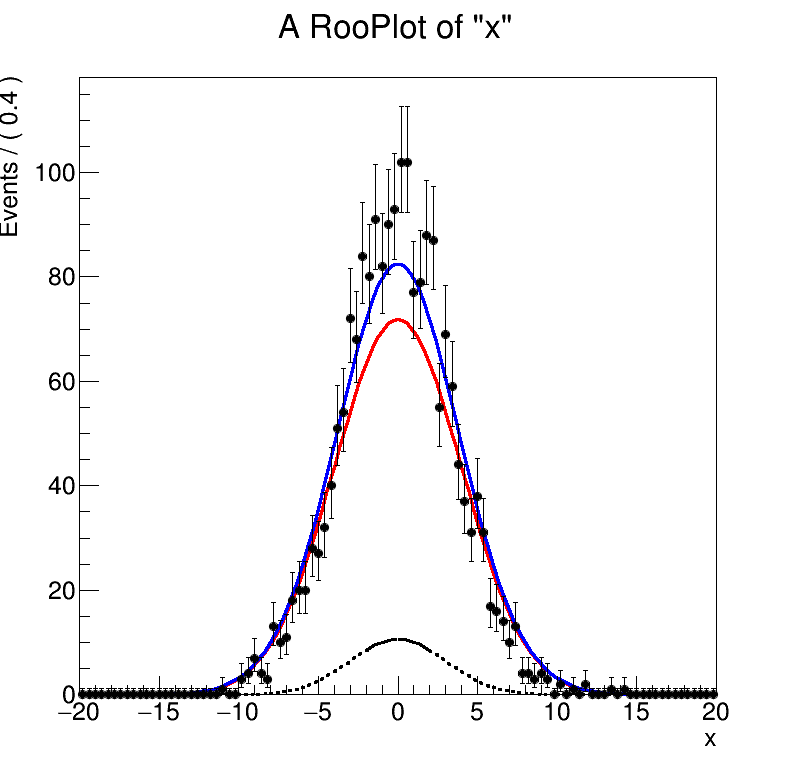

In [5]:
frame = x.frame()
x.setBins(20)


data.plotOn(frame)
frac.setVal(0.1)
model.plotOn(frame, LineColor=ROOT.kBlue,  Name = f'total_truth_{frac}',MoveToBack=True)
model.plotOn(frame, Components=f'g2',LineColor=ROOT.kRed, Name = f'g2_truth_{frac}',MoveToBack=True)
model.plotOn(frame, Components=f'g1',LineColor=ROOT.kBlack, Name = f'g1_truth_{frac}',LineStyle= 2,MoveToBack=True)

c = ROOT.TCanvas('','',800,800)
frame.Draw()
c.Draw()

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (g2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (g1)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()


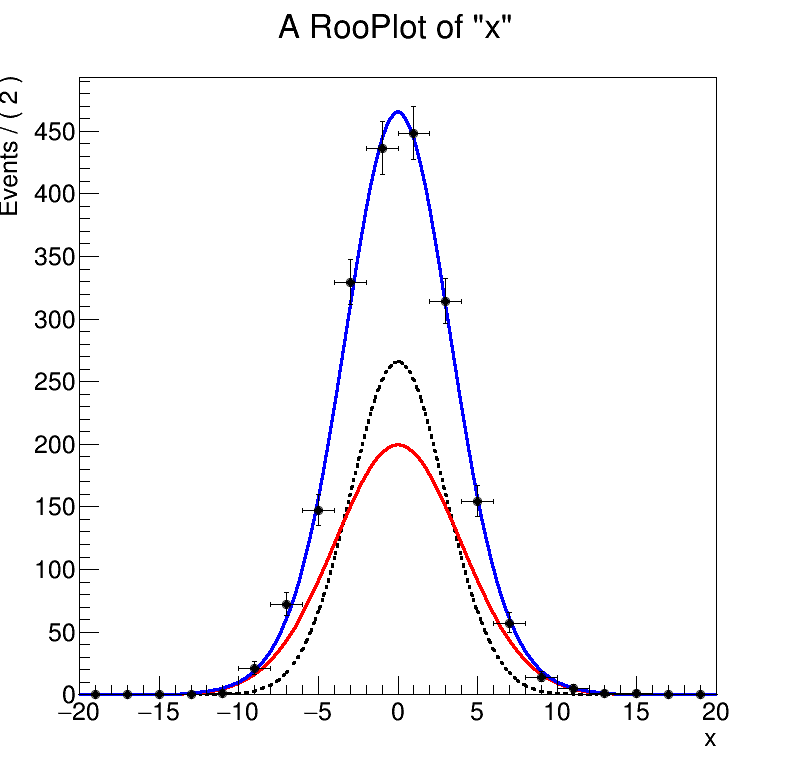

In [6]:
frame = x.frame()
x.setBins(20)


data.plotOn(frame)
frac.setVal(0.5)
model.plotOn(frame, LineColor=ROOT.kBlue,  Name = f'total_truth_{frac}',MoveToBack=True)
model.plotOn(frame, Components=f'g2',LineColor=ROOT.kRed, Name = f'g2_truth_{frac}',MoveToBack=True)
model.plotOn(frame, Components=f'g1',LineColor=ROOT.kBlack, Name = f'g1_truth_{frac}',LineStyle= 2,MoveToBack=True)

c = ROOT.TCanvas('','',800,800)
frame.Draw()
c.Draw()

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (g2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (g1)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()


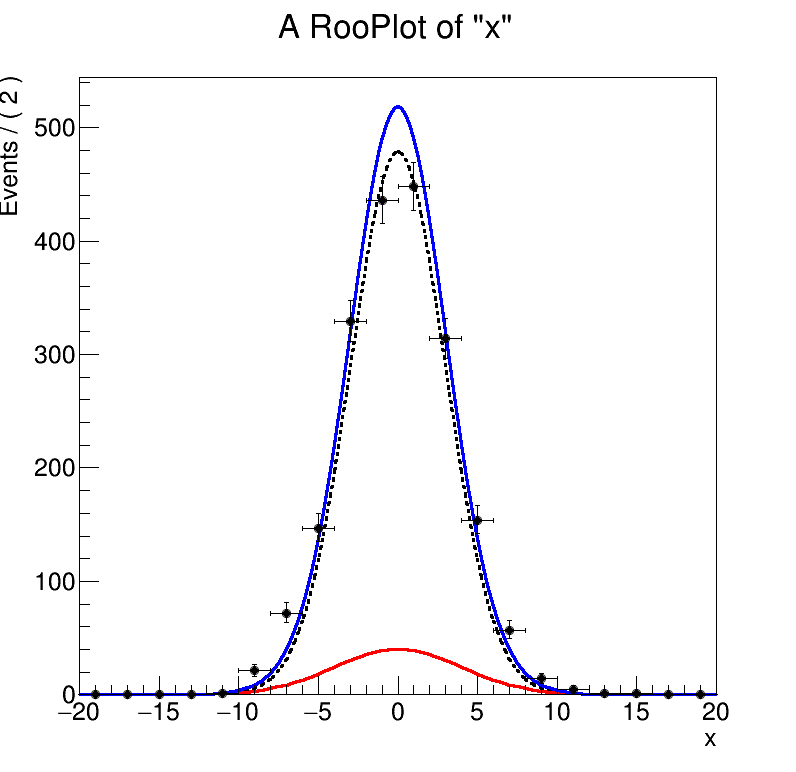

In [7]:
frame = x.frame()
x.setBins(20)


data.plotOn(frame)
frac.setVal(0.9)
model.plotOn(frame, LineColor=ROOT.kBlue,  Name = f'total_truth_{frac}',MoveToBack=True)
model.plotOn(frame, Components=f'g2',LineColor=ROOT.kRed, Name = f'g2_truth_{frac}',MoveToBack=True)
model.plotOn(frame, Components=f'g1',LineColor=ROOT.kBlack, Name = f'g1_truth_{frac}',LineStyle= 2,MoveToBack=True)

c = ROOT.TCanvas('','',800,800)
frame.Draw()
c.Draw()

Construct plain likelihood
---------------------------------------------------

Construct unbinned likelihood

Minimize likelihood w.r.t all parameters before making plots

In [9]:
nll = model.createNLL(data, NumCPU=2)

m = ROOT.RooMinimizer(nll)
m.migrad()
m.hesse()


0

[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 2 remote server process.
Minuit2Minimizer: Minimize with max-calls 1500 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 5320.780744113119
Edm   = 4.74769942406272168e-05
Nfcn  = 79
frac	  = 0.536752	 +/-  0.157601	(limited)
mean	  = -0.0502781	 +/-  0.0771946	(limited)
sigma_g2	  = 3.93192	 +/-  0.278047	(limited)


Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       5343.434043 Edm =       73.90493212 NCalls =      9
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 5343.434043
  Edm           : 73.90493212
  Internal parameters:	[      0.927295218                0    -0.3398369095]	
  Internal gradient  :	[      50.15239614      112.1341307     -29.27719367]	
  Internal covariance matrix:
[[     0.09089829              0              0]
 [              0  9.8036033e-05              0]
 [              0              0     0.07671191]]]
Info in <Minuit2>: VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 1500
Info in <Minuit2>: VariableMetricBuilder    0 - FCN =       5343.434043 Edm =       73.90493212 NCalls =      9
Info in <Minuit2>: VariableMetricBuilder    1 - FCN =       5323.952202 Edm =       14.28462373 NCalls =     21
Info in <Minuit2>: VariableMet

In [10]:
m.migrad()
m.minos([frac,sigma_g2])

mu_upper = frac.getErrorHi()
mu_lower = frac.getErrorLo()
mu_middle = frac.getVal()

mu_lower = mu_middle + mu_lower
mu_upper = mu_middle + mu_upper

theta_upper = sigma_g2.getErrorHi()
theta_lower = sigma_g2.getErrorLo()
theta_middle = sigma_g2.getVal()
theta_hess = sigma_g2.getError()

theta_lower = theta_middle + theta_lower
theta_upper = theta_middle + theta_upper


Minuit2Minimizer: Minimize with max-calls 1500 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 5320.78071958425244
Edm   = 2.30763832662802992e-05
Nfcn  = 37
frac	  = 0.536532	 +/-  0.158054	(limited)
mean	  = -0.0506572	 +/-  0.0772003	(limited)
sigma_g2	  = 3.93207	 +/-  0.278788	(limited)
******************************************************************************************************
Minuit2Minimizer::GetMinosError - Run MINOS LOWER error for parameter #0 : frac using max-calls 1500, tolerance 1
******************************************************************************************************
Minuit2Minimizer::GetMinosError - Run MINOS UPPER error for parameter #0 : frac using max-calls 1500, tolerance 1
Minos: Lower error for parameter frac  :  -0.211021
Minos: Upper error for parameter frac  :  0.130699
******************************************************************************************************
Minuit2Minimizer::GetMinos

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       5320.780744 Edm =   3.082511826e-05 NCalls =     11
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 5320.780744
  Edm           : 3.082511826e-05
  Internal parameters:	[    0.07356947434  -0.005027834855    -0.3884159639]	
  Internal gradient  :	[    0.03682858842     0.7987234346   -0.02368064108]	
  Internal covariance matrix:
[[    0.029975837              0              0]
 [              0  0.00011918158              0]
 [              0              0    0.011787172]]]
Info in <Minuit2>: VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 1500
Info in <Minuit2>: VariableMetricBuilder    0 - FCN =       5320.780744 Edm =   3.082511826e-05 NCalls =     11
Info in <Minuit2>: VariableMetricBuilder    1 - FCN =        5320.78072 Edm =   5.259518405e-06 NCalls =     19
Info in <Minuit2>: Variabl

In [11]:
contour = m.contour(frac,sigma_g2,1,2,0,0,0,0,100)
contour.Print()
sig1 = contour.findObject("contour_nll_model_modelData_n1.000000")
sig2 = contour.findObject("contour_nll_model_modelData_n2.000000")

for sig in [sig1,sig2]:
    sig.SetLineWidth(3)
    sig.SetLineStyle(1)

frame_55c54da2b750 = (TMarker::TMarker,TGraph::contour_nll_model_modelData_n1.000000,TGraph::contour_nll_model_modelData_n2.000000)


Info in <Minuit2>: Minuit2Minimizer::Contour Computing contours - 0.5
Info in <Minuit2>: Minuit2Minimizer::Contour Computing contours - 2


In [12]:
# True profile
frac.setConstant(1)

list_frac = np.linspace(0,0.8,200,dtype='float64')
list_sig_g2 = []
for i in list_frac:
    frac.setVal(i)
    m.migrad()
    list_sig_g2.append(sigma_g2.getVal())
list_sig_g2 = np.array(list_sig_g2,dtype='float64')

graph_theta = ROOT.TGraph(len(list_frac),list_frac,list_sig_g2)
graph_theta.SetLineColor(ROOT.kRed)
graph_theta.SetLineWidth(3)

frac.setConstant(0)
frac.setVal(0.5)
m.migrad()

0

Minuit2Minimizer: Minimize with max-calls 1500 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 5322.48490744667288
Edm   = 3.11766072890870041e-06
Nfcn  = 23
frac	  = 0	 (fixed)
mean	  = -0.0503428	 +/-  0.0774443	(limited)
sigma_g2	  = 3.46345	 +/-  0.054739	(limited)
Minuit2Minimizer: Minimize with max-calls 1500 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 5322.47116628266122
Edm   = 1.21472050506797589e-10
Nfcn  = 24
frac	  = 0.0040201	 (fixed)
mean	  = -0.0503227	 +/-  0.0774495	(limited)
sigma_g2	  = 3.46544	 +/-  0.0549482	(limited)
Minuit2Minimizer: Minimize with max-calls 1500 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 5322.4573830706413
Edm   = 5.07062526952648727e-11
Nfcn  = 24
frac	  = 0.0080402	 (fixed)
mean	  = -0.0503243	 +/-  0.0774515	(limited)
sigma_g2	  = 3.46731	 +/-  0.0551568	(limited)
Minuit2Minimizer: Minimize with max-calls 1500 con

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       5352.114159 Edm =       31.63850007 NCalls =      7
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 5352.114159
  Edm           : 31.63850007
  Internal parameters:	[  -0.005065746156    -0.3883047994]	
  Internal gradient  :	[    -0.4341705086      158.2382293]	
  Internal covariance matrix:
[[  0.00015461727              0]
 [              0   0.0050542061]]]
Info in <Minuit2>: VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 1500
Info in <Minuit2>: VariableMetricBuilder    0 - FCN =       5352.114159 Edm =       31.63850007 NCalls =      7
Info in <Minuit2>: VariableMetricBuilder    1 - FCN =       5322.484907 Edm =   3.034742566e-06 NCalls =     13
Info in <Minuit2>: VariableMetricBuilder After Hessian
Info in <Minuit2>: VariableMetricBuilder    2 - FCN =       5322.484907 Edm =   3.117660

In [13]:
# I'm cheating
# for some reason this works better than the other one.
# I'm not sure what's the issue?
sigma_g2.setConstant(1)

list_frac = []
list_sig_g2 = np.linspace(3.4,6,200,dtype='float64')
for i in list_sig_g2:
    sigma_g2.setVal(i)
    m.migrad()
    list_frac.append(frac.getVal())
list_frac = np.array(list_frac,dtype='float64')

graph_theta = ROOT.TGraph(len(list_frac),list_frac,list_sig_g2)
graph_theta.Set
graph_theta.SetLineColor(ROOT.kRed)
graph_theta.SetLineWidth(5)

sigma_g2.setConstant(0)
sigma_g2.setVal(4)
m.migrad()
m.minos([frac,sigma_g2])

0

Minuit2Minimizer: Minimize with max-calls 1500 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 5323.18056898472969
Edm   = 0.000486227201569040801
Nfcn  = 35
frac	  = 4.0165e-05	 +/-  0.0884258	(limited)
mean	  = -0.0485649	 +/-  0.0760252	(limited)
sigma_g2	  = 3.4	 (fixed)
Minuit2Minimizer: Minimize with max-calls 1500 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 5322.92094654337416
Edm   = 2.42240681817948819e-10
Nfcn  = 24
frac	  = 6.39981e-11	 +/-  0.125861	(limited)
mean	  = -0.0503211	 +/-  0.0763177	(limited)
sigma_g2	  = 3.41307	 (fixed)
Minuit2Minimizer: Minimize with max-calls 1500 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 5322.72304997136052
Edm   = 1.52842161709933227e-10
Nfcn  = 24
frac	  = 7.56685e-11	 +/-  0.224371	(limited)
mean	  = -0.0503211	 +/-  0.0766099	(limited)
sigma_g2	  = 3.42613	 (fixed)
Minuit2Minimizer: Minimize with max-calls

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =        5335.31859 Edm =        10.9252426 NCalls =      7
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 5335.31859
  Edm           : 10.9252426
  Internal parameters:	[    0.07403602448  -0.005077811818]	
  Internal gradient  :	[      21.28756089     0.5842497524]	
  Internal covariance matrix:
[[    0.096435942              0]
 [              0  0.00010219982]]]
Info in <Minuit2>: VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 1500
Info in <Minuit2>: VariableMetricBuilder    0 - FCN =        5335.31859 Edm =        10.9252426 NCalls =      7
Info in <Minuit2>: VariableMetricBuilder    1 - FCN =        5323.92987 Edm =      0.2354090701 NCalls =     14
Info in <Minuit2>: VariableMetricBuilder    2 - FCN =       5323.180569 Edm =   0.0002696652334 NCalls =     25
Info in <Minuit2>: VariableMetric

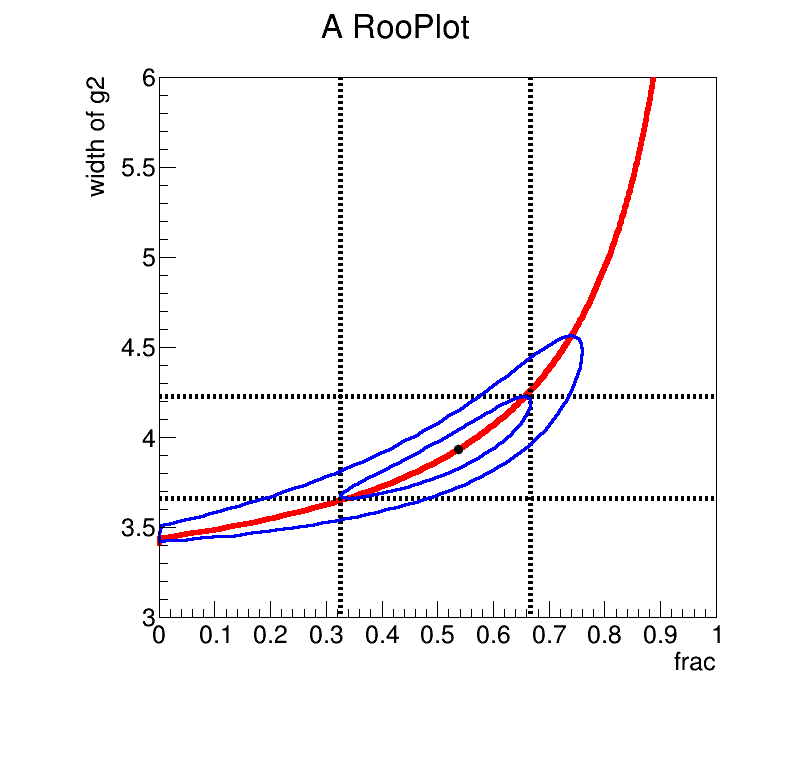

In [14]:
line = ROOT.TLine()
line.SetLineWidth(5)
line.SetLineStyle(2)

c = ROOT.TCanvas('','',800,800)
c.SetBottomMargin(0.2)
c.SetLeftMargin(0.2)
contour.Draw()
graph_theta.Draw('same')
line.DrawLine(mu_lower,3,mu_lower,6)
line.DrawLine(mu_upper,3,mu_upper,6)

line.DrawLine(0, theta_lower,1,theta_lower)
line.DrawLine(0, theta_upper,1,theta_upper)
contour.Draw('same')
c.Draw()

Plot likelihood scan frac

In [15]:
frame1 = frac.frame(Bins=10, Range=(0., 1.), Title="LL and profileLL in frac")
nll.plotOn(frame1, ShiftToZero=True,LineWidth=5,Name='ll',LineColor='m')

[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 2 remote server process.


Plot likelihood scan in sigma_g2

In [16]:
frame2 = sigma_g2.frame(Bins=10, Range=(3, 6.0), Title="LL and profileLL in sigma_g2")
nll.plotOn(frame2, ShiftToZero=True,LineWidth=5,Name='ll',LineColor='m')

[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 2 remote server process.


Construct profile likelihood in frac
-----------------------------------------------------------------------

The profile likelihood estimator on nll for frac will minimize nll w.r.t
all floating parameters except frac for each evaluation

In [17]:
pll_frac = nll.createProfile({frac})

Plot the profile likelihood in frac

In [18]:
pll_frac.plotOn(frame1, LineColor="b",LineWidth=5,Name='pll')

[#1] INFO:Minimization -- RooProfileLL::evaluate(nll_model_modelData_Profile[frac]) Creating instance of MINUIT
[#1] INFO:Minimization -- RooProfileLL::evaluate(nll_model_modelData_Profile[frac]) determining minimum likelihood for current configurations w.r.t all observable
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 2 remote server process.
[#1] INFO:Minimization -- RooProfileLL::evaluate(nll_model_modelData_Profile[frac]) minimum found at (frac=0.536058)
..........................................................................................

Adjust frame maximum for visual clarity

In [19]:
frame1.SetMinimum(0)
frame1.SetMaximum(3)

Construct profile likelihood in sigma_g2
-------------------------------------------------------------------------------

The profile likelihood estimator on nll for sigma_g2 will minimize nll
w.r.t all floating parameters except sigma_g2 for each evaluation

In [20]:
pll_sigmag2 = nll.createProfile({sigma_g2})

Plot the profile likelihood in sigma_g2

In [21]:
pll_sigmag2.plotOn(frame2, LineColor="b",LineWidth=5,Name='pll')


[#1] INFO:Minimization -- RooProfileLL::evaluate(nll_model_modelData_Profile[sigma_g2]) Creating instance of MINUIT
[#1] INFO:Minimization -- RooProfileLL::evaluate(nll_model_modelData_Profile[sigma_g2]) determining minimum likelihood for current configurations w.r.t all observable
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 2 remote server process.
[#1] INFO:Minimization -- RooProfileLL::evaluate(nll_model_modelData_Profile[sigma_g2]) minimum found at (sigma_g2=3.931)
..............................................................................

Adjust frame maximum for visual clarity

In [22]:
frame2.SetMinimum(0)
frame2.SetMaximum(3)

Make canvas and draw ROOT.RooPlots

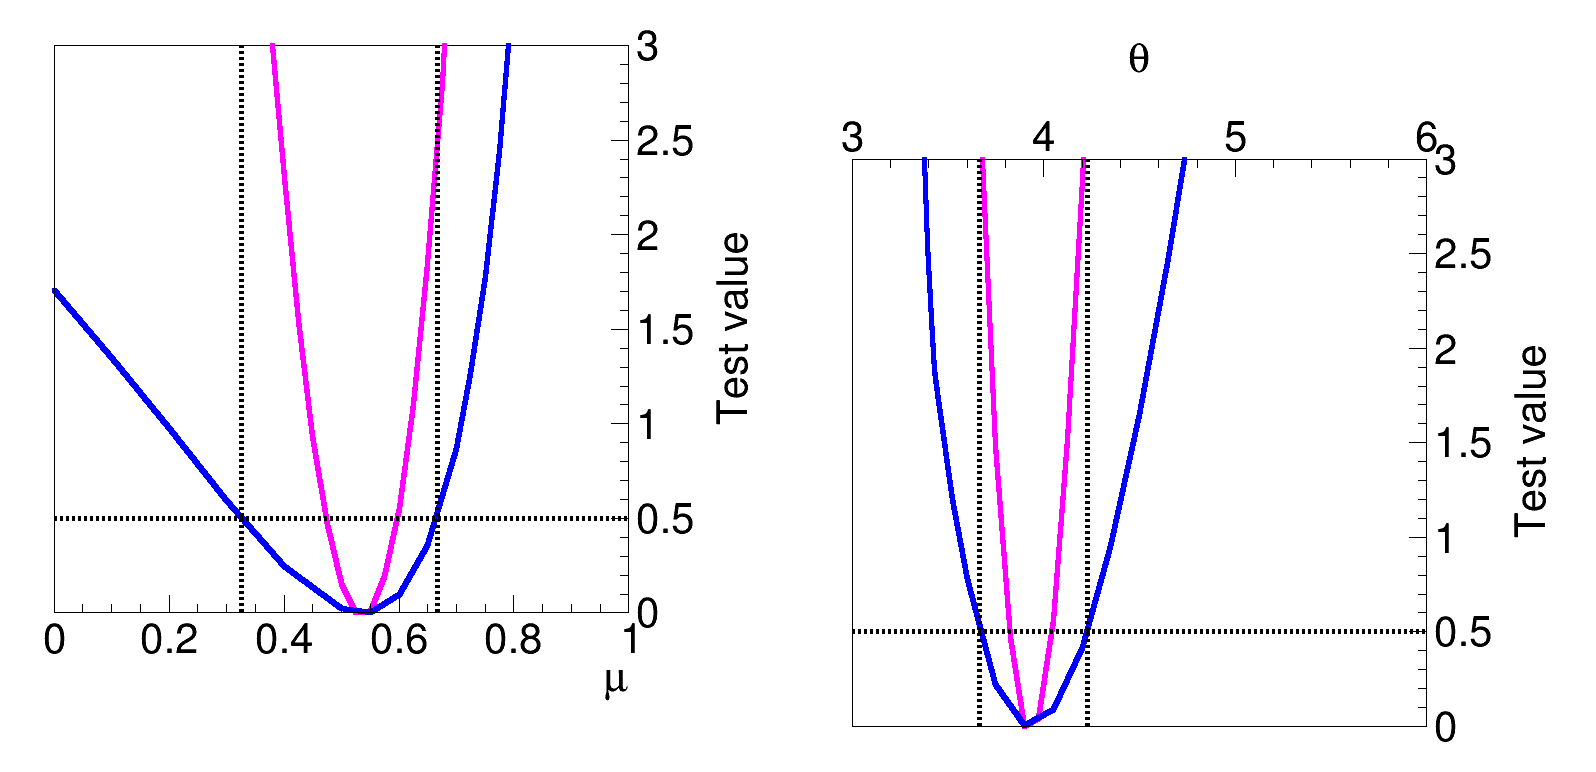

In [23]:
l = ROOT.TLine()
l.SetLineWidth(5)
l.SetLineStyle(2)

c = ROOT.TCanvas("rf605_profilell", "rf605_profilell", 1600, 800)
c.Divide(2)
c.cd(1)
ROOT.gPad.SetBottomMargin(0.2)
ROOT.gPad.SetLeftMargin(0.05)
ROOT.gPad.SetRightMargin(0.2)
ROOT.gPad.SetTopMargin(0.05)


frame1.GetYaxis().SetTitleOffset(1.4)
frame1.SetLabelSize(0.06,'xy')
frame1.SetTitleSize(0.06,'xy')
frame1.GetYaxis().SetNdivisions(508)
frame1.GetXaxis().SetNdivisions(508)
frame1.SetTitle(';#mu;Test value')
frame1.GetYaxis().SetLabelOffset(999);
frame1.GetYaxis().SetTickLength(0);


frame1.Draw()

legend = ROOT.TLegend(0.22,0.6,0.47,0.88)
legend.AddEntry(frame1.findObject('ll'),' ','l')
legend.AddEntry(frame1.findObject('pll'),' ','l')
# legend.DrawClone()

ROOT.gPad.Draw()
l.DrawLine(ROOT.gPad.GetUxmin(),0.5,ROOT.gPad.GetUxmax(),0.5)
l.DrawLine(mu_lower,0,mu_lower,3)
l.DrawLine(mu_upper,0,mu_upper,3)


newaxis = ROOT.TGaxis(ROOT.gPad.GetUxmax(), 
                      ROOT.gPad.GetUymin(),
                      ROOT.gPad.GetUxmax(),
                      ROOT.gPad.GetUymax(),
                      0,
                      3,
                      812,"L+");

label_font = frame1.GetYaxis().GetLabelFont()
title_font =frame1.GetYaxis().GetTitleFont()

newaxis.SetLabelSize(0.06)
newaxis.SetTitleSize(0.06)
newaxis.SetLabelOffset(0.01)
newaxis.SetTitleFont(title_font)
newaxis.SetLabelFont(label_font)
newaxis.SetTitle('Test value')
newaxis.SetTitleOffset(1.4)
newaxis.CenterTitle(1)
newaxis.DrawClone()



c.cd(2)
ROOT.gPad.SetLeftMargin(0.2)
frame2.GetYaxis().SetTitleOffset(1.4)
frame2.Draw()
frame2.SetLabelSize(0.06,'xy')
frame2.SetTitleSize(0.06,'xy')
frame2.GetYaxis().SetNdivisions(508)
frame2.GetXaxis().SetNdivisions(508)
frame2.SetTitle(' ;#theta;Test value')

ROOT.gPad.SetLeftMargin(0.05)
ROOT.gPad.SetBottomMargin(0.05)
ROOT.gPad.SetRightMargin(0.2)
ROOT.gPad.SetTopMargin(0.2)



legend = ROOT.TLegend(0.52,0.07,0.77,0.35)
legend.AddEntry(frame2.findObject('ll'),' ','l')
legend.AddEntry(frame2.findObject('pll'),' ','l')


ROOT.gPad.Draw()
l.DrawLine(ROOT.gPad.GetUxmin(),0.5,ROOT.gPad.GetUxmax(),0.5)
l.DrawLine(theta_lower,0,theta_lower,3)
l.DrawLine(theta_upper,0,theta_upper,3)



frame2.GetXaxis().SetLabelOffset(999);
frame2.GetXaxis().SetTickLength(0);

frame2.GetYaxis().SetLabelOffset(999);
frame2.GetYaxis().SetTickLength(0);

label_font = frame2.GetYaxis().GetLabelFont()
title_font =frame2.GetYaxis().GetTitleFont()

newaxis = ROOT.TGaxis(ROOT.gPad.GetUxmax(), 
                      ROOT.gPad.GetUymin(),
                      ROOT.gPad.GetUxmax(),
                      ROOT.gPad.GetUymax(),
                      0,
                      3,
                      812,"L+");

newaxis.SetLabelSize(0.06)
newaxis.SetTitleSize(0.06)
newaxis.SetLabelOffset(0.01)
newaxis.SetTitleFont(title_font)
newaxis.SetLabelFont(label_font)
newaxis.SetTitle('Test value')
newaxis.SetTitleOffset(1.4)
newaxis.CenterTitle(1)
newaxis.DrawClone()

newaxis = ROOT.TGaxis(ROOT.gPad.GetUxmin(), 
                      ROOT.gPad.GetUymax(),
                      ROOT.gPad.GetUxmax(),
                      ROOT.gPad.GetUymax(),
                      3,
                      6,
                      805,"C-");

newaxis.SetLabelSize(0.06)
newaxis.SetTitleSize(0.06)
# newaxis.SetLabelOffset(0.01)
newaxis.SetTitleFont(title_font)
newaxis.SetLabelFont(label_font)
newaxis.SetTitle('#theta')
newaxis.SetTitleOffset(1.4)
newaxis.CenterTitle(1)
newaxis.DrawClone()

frame2.GetYaxis().SetLabelOffset(999);
frame2.GetYaxis().SetTickLength(0);


# legend.Draw()
ROOT.gROOT.GetListOfCanvases().Draw()

In [24]:
def set_margin(mother, top,bottom,right,left):
    mother.SetTopMargin(top)  # joins upper and lower plot
    mother.SetBottomMargin(bottom)
    mother.SetRightMargin(right)
    mother.SetLeftMargin(left)
    
def createHorizontalPads(mother):
    mother.cd()
    # Upper histogram plot is pad1
    pad1 = ROOT.TPad('1', '1', 0, 0, 0.5, 1.0)
    pad1.Draw()
    # Lower ratio plot is pad2
    mother.cd()  # returns to main canvas before defining pad2
    pad2 = ROOT.TPad('2','2', 0.5, 0., 1, 1)
    pad2.Draw()
    return pad1, pad2

def createVerticalPads(mother):
    mother.cd()
    # Upper histogram plot is pad1
    pad1 = ROOT.TPad('1', '1', 0., 0.5, 1., 1.0)
    pad1.SetGridx()
    pad1.Draw()
    # Lower ratio plot is pad2
    mother.cd()  # returns to main canvas before defining pad2
    pad2 = ROOT.TPad('2','2', 0, 0.0, 1, 0.5)
    pad2.SetGridx()
    pad2.Draw()
    
    return pad1, pad2
get_axhline = lambda pad, axhline: ROOT.TLine(pad.GetUxmin(),axhline,pad.GetUxmax(),axhline)
get_axvline = lambda pad, axvline: ROOT.TLine(axvline,pad.GetUymin(),axvline,pad.GetUymax())

In [25]:
nll = model.createNLL(data, NumCPU=4)
pll_frac = nll.createProfile({frac})

m = ROOT.RooMinimizer(nll)
m.migrad()
m.hesse()

0


[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 4 remote server process.
Minuit2Minimizer: Minimize with max-calls 1500 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 5320.78070115841456
Edm   = 4.59223289767312105e-06
Nfcn  = 35
frac	  = 0.536058	 +/-  0.158155	(limited)
mean	  = -0.0507656	 +/-  0.0771987	(limited)
sigma_g2	  = 3.931	 +/-  0.278437	(limited)


Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       5320.780702 Edm =   1.643243201e-06 NCalls =     11
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 5320.780702
  Edm           : 1.643243201e-06
  Internal parameters:	[    0.07214363078   -0.00508061687    -0.3889789517]	
  Internal gradient  :	[   -0.00305947756   -0.09051426251    0.02125362033]	
  Internal covariance matrix:
[[    0.030031151              0              0]
 [              0  0.00011919961              0]
 [              0              0    0.011766867]]]
Info in <Minuit2>: VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 1500
Info in <Minuit2>: VariableMetricBuilder    0 - FCN =       5320.780702 Edm =   1.643243201e-06 NCalls =     11
Info in <Minuit2>: VariableMetricBuilder    1 - FCN =       5320.780701 Edm =    5.62550524e-07 NCalls =     19
Info in <Minuit2>: Variabl

In [26]:
frame1 = frac.frame(Bins=30, Range=(0.05, 1.), Title="LL and profileLL in frac")
pll_frac.plotOn(frame1,LineColor = ROOT.kBlue)
nll.plotOn(frame1,ShiftToZero=True,LineColor = ROOT.kMagenta)
frame1.SetMinimum(0)
frame1.SetMaximum(3.)

def make_frame2(frac_val,sigma_max,sigma_pll,truth = {'frac':0.5,'sig':4}):
    x.setBins(40)
    frame2 = x.frame(Range=(-10., 10.))
    
    frame3 = x.frame(Range=(-10., 10.))
    
    data.plotOn( frame2, Name= 'data')    
    
    sigma_g2.setVal(sigma_max)
    frac.setVal(frac_val)

    model.plotOn(frame2, LineColor=ROOT.kMagenta,  Name = 'total_ll',MoveToBack=True)
    model.plotOn(frame2, Components=f'g2',LineColor=ROOT.kMagenta, Name = 'g2_ll',MoveToBack=True)
    model.plotOn(frame2, Components=f'g1',LineColor=ROOT.kRed, Name = 'g1_ll',LineStyle= 2,MoveToBack=True)

    model.plotOn(frame3, LineColor=ROOT.kBlue,  Name = 'total_ll',MoveToBack=True)
    model.plotOn(frame3, Components=f'g2',LineColor=ROOT.kMagenta, Name = 'g2_ll',MoveToBack=True)
    model.plotOn(frame3, Components=f'g1',LineColor=ROOT.kRed, Name = 'g1_ll',LineStyle= 2,MoveToBack=True)

    sigma_g2.setVal(sigma_pll)
    frac.setVal(frac_val)
    
    model.plotOn(frame2, LineColor=ROOT.kBlue,  Name = 'total_pll',MoveToBack=True)
    model.plotOn(frame2, Components=f'g2',LineColor=ROOT.kBlue, Name = 'g2_pll',MoveToBack=True)
    model.plotOn(frame2, Components=f'g1',LineColor=ROOT.kRed, Name = 'g1_pll',LineStyle= 2,MoveToBack=True)

    model.plotOn(frame3, LineColor=ROOT.kBlue,  Name = 'total_pll',MoveToBack=True)
    model.plotOn(frame3, Components=f'g2',LineColor=ROOT.kBlue, Name = 'g2_pll',MoveToBack=True)
    model.plotOn(frame3, Components=f'g1',LineColor=ROOT.kRed, Name = 'g1_pll',LineStyle= 2,MoveToBack=True)

    sigma_g2.setVal(truth['sig'])
    frac.setVal(truth['frac'])
    
    model.plotOn(frame2, LineColor=ROOT.kBlack,  Name = 'total_truth',MoveToBack=True)
    model.plotOn(frame2, Components=f'g2',LineColor=ROOT.kBlack, Name = 'g2_truth',MoveToBack=True)
    model.plotOn(frame2, Components=f'g1',LineColor=ROOT.kBlack, Name = 'g1_truth',LineStyle= 2,MoveToBack=True)

    model.plotOn(frame3, LineColor=ROOT.kBlack,  Name = 'total_truth',MoveToBack=True)
    model.plotOn(frame3, Components=f'g2',LineColor=ROOT.kBlack, Name = 'g2_truth',MoveToBack=True)
    model.plotOn(frame3, Components=f'g1',LineColor=ROOT.kBlack, Name = 'g1_truth',LineStyle= 2,MoveToBack=True)


    line = ROOT.TLine(frac_val,0,frac_val,5)
    return frame2, frame3,line

[#1] INFO:Minimization -- RooProfileLL::evaluate(nll_model_modelData_Profile[frac]) Creating instance of MINUIT
[#1] INFO:Minimization -- RooProfileLL::evaluate(nll_model_modelData_Profile[frac]) determining minimum likelihood for current configurations w.r.t all observable
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 4 remote server process.
[#1] INFO:Minimization -- RooProfileLL::evaluate(nll_model_modelData_Profile[frac]) minimum found at (frac=0.535979)
........................................................................................................................
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 4 remote server process.


In [27]:
def make_plot(frame1,frame2,frame3,frame4,frac_value,global_g2):
    l = ROOT.TLine()
    l.SetLineWidth(3)
    c = ROOT.TCanvas('','',1000,800)

    pad1,pad2  = createHorizontalPads(c)    
    pad11,pad12 = createVerticalPads(pad1)
    
    x_max = frame2.GetXaxis().GetXmax()
    x_min = frame2.GetXaxis().GetXmin()
    frame1.GetXaxis().SetRangeUser(x_min,x_max)
    
    pad11.cd()
    frame1.Draw()
    
    frame1.GetXaxis().SetLabelSize(0.08)
    frame1.GetYaxis().SetLabelSize(0.08)

    frame1.GetXaxis().SetTitleSize(0.08)
    frame1.GetYaxis().SetTitleSize(0.08)

    frame1.GetXaxis().SetNdivisions(505)
    frame1.GetYaxis().SetTitleOffset(999);

    ROOT.gPad.Draw()
    l.SetLineWidth(5)
    l.SetLineStyle(2)
    l.DrawLine(frac_value,ROOT.gPad.GetUymin(),frac_value,ROOT.gPad.GetUymax())
    l.SetLineWidth(3)
    l.SetLineStyle(1)
    l.DrawLine(ROOT.gPad.GetUxmin(),global_g2,ROOT.gPad.GetUxmax(),global_g2)
    
    pad12.cd()
    frame2.Draw()
    frame2.SetTitle('LR (Magenta)/ PLR (Blue);#mu; Ratio test')
    ROOT.gPad.Draw()
    l.SetLineWidth(5)
    l.SetLineStyle(2)
    l.DrawLine(frac_value,ROOT.gPad.GetUymin(),frac_value,ROOT.gPad.GetUymax())
    l.SetLineWidth(3)
    l.SetLineStyle(1)
    l.DrawLine(ROOT.gPad.GetUxmin(),0.5,ROOT.gPad.GetUxmax(),0.5)
        
    frame2.GetXaxis().SetLabelSize(0.08)
    frame2.GetYaxis().SetLabelSize(0.08)

    frame2.GetXaxis().SetTitleSize(0.08)
    frame2.GetYaxis().SetTitleSize(0.08)

    frame2.GetXaxis().SetNdivisions(505)
    frame2.GetYaxis().SetTitleOffset(999);
    
    pad2.cd()
    pad2.SetLeftMargin(0.15)
    frame3.Draw()
    
    frame3.GetXaxis().SetLabelSize(0.08)
    frame3.GetYaxis().SetLabelSize(0.08)

    frame3.GetXaxis().SetTitleSize(0.08)
    frame3.GetYaxis().SetTitleSize(0.08)

    frame3.GetXaxis().SetNdivisions(505)

    c.Draw()
    return c

In [40]:
# I'm cheating
# for some reason this works better than the other one.
# I'm not sure what's the issue?
sigma_g2.setConstant(1)

list_frac = []
list_sig_g2 = np.linspace(3.4,6,200,dtype='float64')
for i in list_sig_g2:
    sigma_g2.setVal(i)
    m.migrad()
    list_frac.append(frac.getVal())
list_frac = np.array(list_frac,dtype='float64')

graph_theta = ROOT.TGraph(len(list_frac),list_frac,list_sig_g2)
graph_theta.Set
graph_theta.SetLineColor(ROOT.kRed)
graph_theta.SetLineWidth(5)

sigma_g2.setConstant(0)
sigma_g2.setVal(4)
m.migrad()
m.minos([frac,sigma_g2])

0

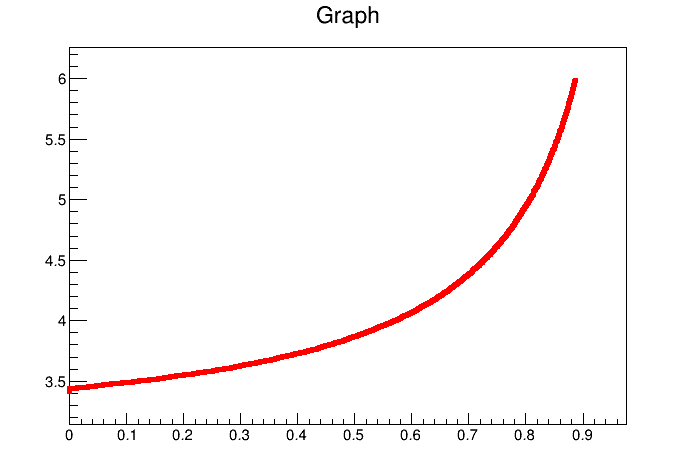

In [41]:
best_fit_line = ROOT.TLine(0.4,4.2,0.8,4.2)

frame0 = ROOT.TCanvas()
graph_theta.Draw('AL')

frame0.Draw()

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (g2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (g1)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (g2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (g1)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (g2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (g1)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirec

Info in <TCanvas::Print>: png file 010.png has been created


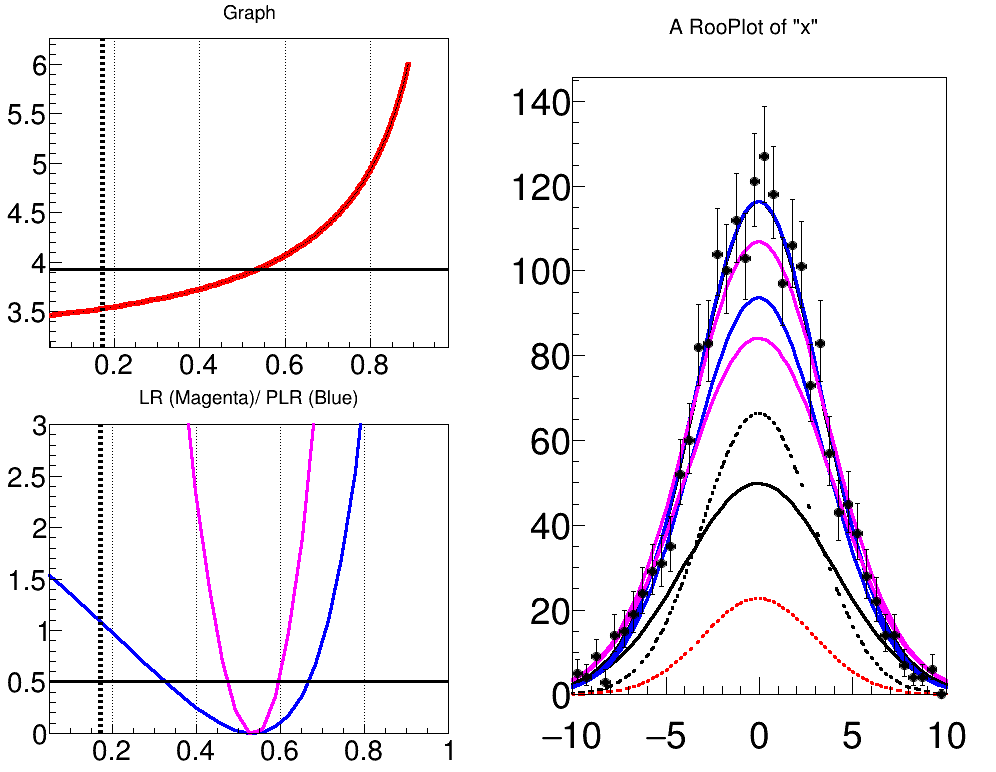

In [42]:
index = 10
frac_value = list_frac[index]
pll_g2 = list_sig_g2[index]

m.migrad()
best_g2 = sigma_g2.getVal()

frame2,frame3,line = make_frame2(frac_value,best_g2,pll_g2)

c = make_plot(graph_theta,frame1,frame2,frame3,frac_value,best_g2)
c.SaveAs(f'{index:03}.png')

In [33]:
reversed

reversed

In [44]:
m.migrad()

0

In [45]:
sigma_g2.getVal()

3.934384980058583

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (g2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (g1)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (g2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (g1)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (g2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (g1)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirec

Info in <TCanvas::Print>: png file plr_plots/reverse_000.png has been created
Info in <TCanvas::Print>: png file plr_plots/reverse_001.png has been created
Info in <TCanvas::Print>: png file plr_plots/reverse_002.png has been created
Info in <TCanvas::Print>: png file plr_plots/reverse_003.png has been created
Info in <TCanvas::Print>: png file plr_plots/reverse_004.png has been created
Info in <TCanvas::Print>: png file plr_plots/reverse_005.png has been created
Info in <TCanvas::Print>: png file plr_plots/reverse_006.png has been created
Info in <TCanvas::Print>: png file plr_plots/reverse_007.png has been created
Info in <TCanvas::Print>: png file plr_plots/reverse_008.png has been created
Info in <TCanvas::Print>: png file plr_plots/reverse_009.png has been created
Info in <TCanvas::Print>: png file plr_plots/reverse_010.png has been created
Info in <TCanvas::Print>: png file plr_plots/reverse_011.png has been created
Info in <TCanvas::Print>: png file plr_plots/reverse_012.png has

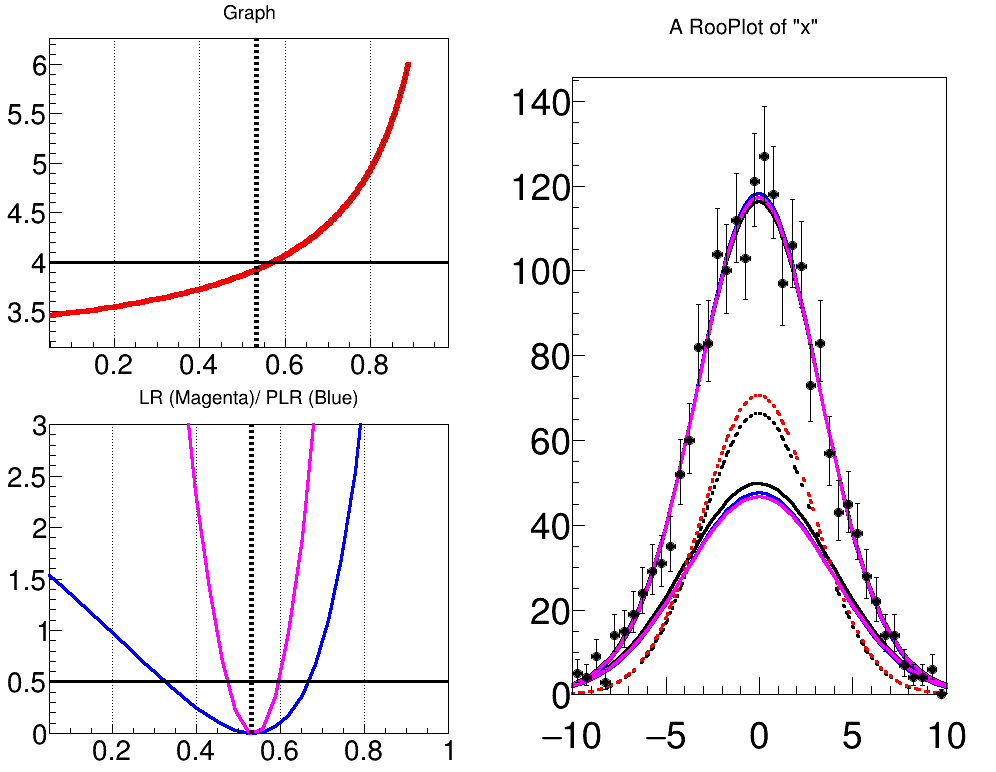

In [56]:
mask = list_sig_g2<3.9343849636316213
mask_2 = list_frac>0.15
mask = mask & mask_2
lower_half_g2 = list_sig_g2[mask][::-1]
lower_half_frac = list_frac[mask][::-1]

lower_half_frac = np.concatenate([lower_half_frac,lower_half_frac[::-1]])
lower_half_g2   = np.concatenate([lower_half_g2,lower_half_g2[::-1]])

for index, frac_value in enumerate(lower_half_frac):    
    pll_g2 = lower_half_g2[index]
    best_g2 = sigma_g2.getVal()
    frame2,frame3,line = make_frame2(frac_value,best_g2,pll_g2)
    c = make_plot(graph_theta,frame1,frame2,frame3,frac_value,best_g2)
    c.SaveAs(f'plr_plots/reverse_{index:03}.png')

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (g2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (g1)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (g2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (g1)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (g2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (g1)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirec

Info in <TCanvas::Print>: png file plr_plots/forward_000.png has been created
Info in <TCanvas::Print>: png file plr_plots/forward_001.png has been created
Info in <TCanvas::Print>: png file plr_plots/forward_002.png has been created
Info in <TCanvas::Print>: png file plr_plots/forward_003.png has been created
Info in <TCanvas::Print>: png file plr_plots/forward_004.png has been created
Info in <TCanvas::Print>: png file plr_plots/forward_005.png has been created
Info in <TCanvas::Print>: png file plr_plots/forward_006.png has been created
Info in <TCanvas::Print>: png file plr_plots/forward_007.png has been created
Info in <TCanvas::Print>: png file plr_plots/forward_008.png has been created
Info in <TCanvas::Print>: png file plr_plots/forward_009.png has been created
Info in <TCanvas::Print>: png file plr_plots/forward_010.png has been created
Info in <TCanvas::Print>: png file plr_plots/forward_011.png has been created
Info in <TCanvas::Print>: png file plr_plots/forward_012.png has

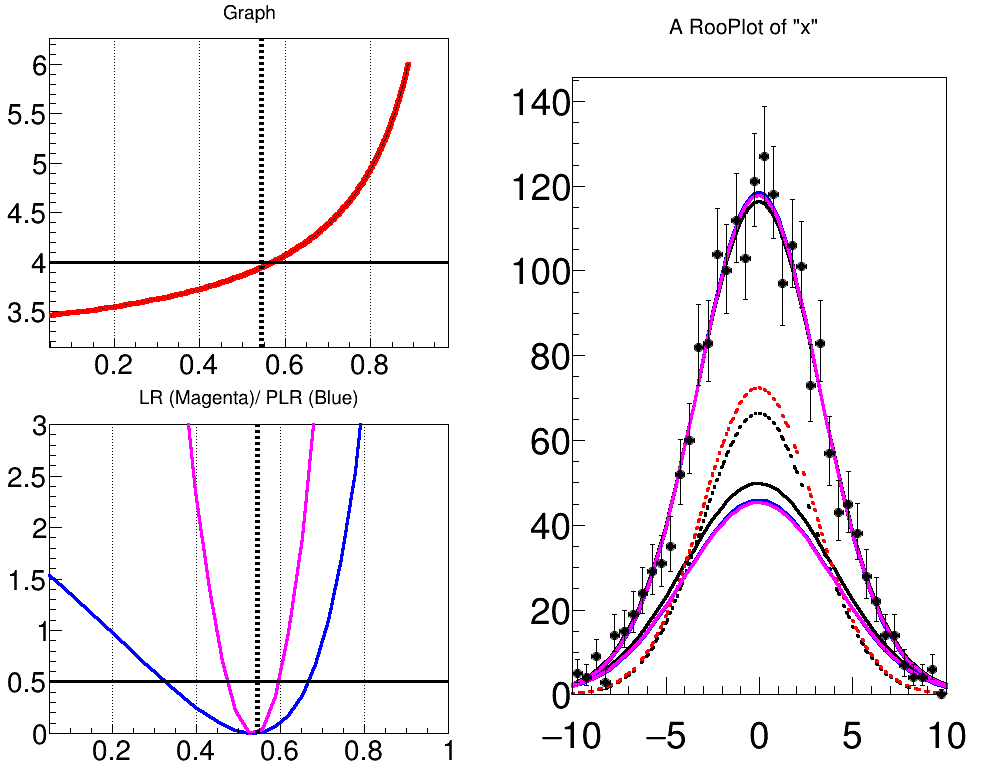

In [69]:
mask = list_sig_g2>3.9343849636316213
mask_2 = list_frac<0.8
mask = mask & mask_2
upper_half_g2 = list_sig_g2[mask]
upper_half_frac = list_frac[mask]

upper_half_frac = np.concatenate([upper_half_frac,upper_half_frac[::-1]])[::2]
Upper_half_g2   = np.concatenate([upper_half_g2,upper_half_g2[::-1]])[::2]

for index, frac_value in enumerate(upper_half_frac):    
    pll_g2 = Upper_half_g2[index]
    best_g2 = sigma_g2.getVal()
    frame2,frame3,line = make_frame2(frac_value,best_g2,pll_g2)
    c = make_plot(graph_theta,frame1,frame2,frame3,frac_value,best_g2)
    c.SaveAs(f'plr_plots/forward_{index:03}.png')

In [59]:
### animate with this bash command:
### convert -delay 15 -loop 0 forward*.png forward_animated.gif

Adopted from:

'LIKELIHOOD AND MINIMIZATION' RooFit tutorial macro #605

Working with the profile likelihood estimator

Clemens Lange, Wouter Verkerke (C version)  
